## **Recommender Systems (Fortnite)**

### **Glossary**
#### This dataset contains 5 games mode (Solo, Duo, Trios. Squads and ltm) each have:
#### **Score:** Total Score.
#### **top1:** Total Wins.
#### **kd:** Kill/Death Ratio.
#### **WinRatio:** Win Ratio.
#### **matches:** Number of played matches.
#### **kills:** Number of eliminations made.
#### **minutesPlayed:** Total number of spent minutes playing the game.

#### **The data was collected during Season 6 Chapter 2 Apr 2021 using the Fortnite tracker API from the tracker network website. (https://tracker.gg/).**

### **Importing Libraries**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, silhouette_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

### **Loading Data**

In [104]:
fortnite = pd.read_csv("Dataset/fortnite_players_stats.csv")
fortnite.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0
5,Twitch Kayotica,2919037,1310,3.23,9.7,13438,39131,96777,1298412,1242,...,40507.0,89472.0,294971.0,184.0,185.0,4.81,11.7,1566.0,6654.0,8296.0
6,FaZe Replays,2389537,1454,3.84,7.8,18670,66161,76258,2508015,1935,...,40730.0,69693.0,383002.0,274.0,259.0,4.49,7.4,3718.0,15447.0,12634.0
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739,6438735,5449,...,6803.0,30012.0,370497.0,185.0,267.0,2.67,8.2,2263.0,5541.0,12625.0
8,ᴮᵒˢˢン,6772116,6480,1.39,32.6,19864,18610,283835,118705,65,...,1238.0,19419.0,827372.0,118.0,116.0,2.01,3.8,3067.0,5937.0,19174.0
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441,5873450,1250,...,6695.0,51058.0,440353.0,97.0,199.0,1.09,3.2,3048.0,3205.0,17273.0


### **Exploratory Data Analysis**

In [105]:
fortnite.describe().T

,count,mean,std,min,25%,50%,75%,max
Solo score,1435.0,1.088202e+06,887263.904448,4453.00,435517.000,907001.00,1506555.000,6772116.00
Solo top1,1435.0,3.289094e+02,529.192568,0.00,65.500,162.00,366.000,6480.00
Solo kd,1435.0,1.816300e+00,1.156026,0.08,1.050,1.48,2.200,9.60
Solo winRatio,1435.0,4.853937e+00,5.330249,0.00,1.600,2.90,6.100,44.10
Solo matches,1435.0,6.911061e+03,5408.219523,30.00,2875.000,5728.00,9585.000,36487.00
Solo kills,1435.0,1.178184e+04,11417.340071,28.00,3861.000,8452.00,15993.000,89023.00
Solo minutesPlayed,1435.0,4.351714e+04,36314.877771,210.00,16922.000,35762.00,59471.000,283835.00
Duos score,1435.0,1.397810e+06,980569.276706,376.00,586357.500,1185518.00,1994718.500,6438735.00
Duos top1,1435.0,8.366028e+02,727.366968,0.00,321.000,685.00,1103.500,7594.00
Duos kd,1435.0,2.483686e+00,1.596461,0.00,1.395,2.09,3.050,14.00


In [106]:
fortnite.describe().T , fortnite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                1435 non-null   object 
 1   Solo score            1435 non-null   int64  
 2   Solo top1             1435 non-null   int64  
 3   Solo kd               1435 non-null   float64
 4   Solo winRatio         1435 non-null   float64
 5   Solo matches          1435 non-null   int64  
 6   Solo kills            1435 non-null   int64  
 7   Solo minutesPlayed    1435 non-null   int64  
 8   Duos score            1435 non-null   int64  
 9   Duos top1             1435 non-null   int64  
 10  Duos kd               1435 non-null   float64
 11  Duos winRatio         1435 non-null   float64
 12  Duos matches          1435 non-null   int64  
 13  Duos kills            1435 non-null   int64  
 14  Duos minutesPlayed    1435 non-null   int64  
 15  Trios score          

(                       count          mean            std      min  \
 Solo score            1435.0  1.088202e+06  887263.904448  4453.00   
 Solo top1             1435.0  3.289094e+02     529.192568     0.00   
 Solo kd               1435.0  1.816300e+00       1.156026     0.08   
 Solo winRatio         1435.0  4.853937e+00       5.330249     0.00   
 Solo matches          1435.0  6.911061e+03    5408.219523    30.00   
 Solo kills            1435.0  1.178184e+04   11417.340071    28.00   
 Solo minutesPlayed    1435.0  4.351714e+04   36314.877771   210.00   
 Duos score            1435.0  1.397810e+06  980569.276706   376.00   
 Duos top1             1435.0  8.366028e+02     727.366968     0.00   
 Duos kd               1435.0  2.483686e+00       1.596461     0.00   
 Duos winRatio         1435.0  1.118523e+01       7.413677     0.00   
 Duos matches          1435.0  7.903975e+03    5470.436878     3.00   
 Duos kills            1435.0  1.530315e+04   11842.304429     0.00   
 Duos 

In [107]:
# Assigning an unique id for each player
fortnite["user_id"] = [n+1 for n in range(0,1435)]

### **Game Mode: Solos**

In [108]:
# Creating a dataframe with just the solos data
fortnite_solos = pd.concat([fortnite["user_id"], fortnite["Player"], 
                            fortnite["Solo score"], fortnite["Solo top1"], 
                            fortnite["Solo kd"], fortnite["Solo winRatio"], 
                            fortnite["Solo matches"], fortnite["Solo kills"], 
                            fortnite["Solo minutesPlayed"]], axis=1)
fortnite_solos

,user_id,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,1,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389
1,2,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732
2,3,Raпger,4519465,4582,9.60,34.0,13488,85481,122171
3,4,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453
4,5,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245
...,...,...,...,...,...,...,...,...,...
1430,1431,im bloom,106294,26,2.03,3.5,736,1440,4470
1431,1432,Twitch kaOzs_,803918,396,3.42,13.2,3001,8911,27375
1432,1433,slxyher,603939,310,1.69,5.1,6035,9679,20545
1433,1434,RD-Antony,747295,71,1.10,1.9,3763,4048,31147


In [109]:
# Analyzing null and duplicated values
fortnite_solos.isna().sum(), fortnite_solos.duplicated().sum()

(user_id               0
 Player                0
 Solo score            0
 Solo top1             0
 Solo kd               0
 Solo winRatio         0
 Solo matches          0
 Solo kills            0
 Solo minutesPlayed    0
 dtype: int64,
 0)

In [110]:
corr_matrix = fortnite_solos.drop(columns=["user_id","Player"]).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

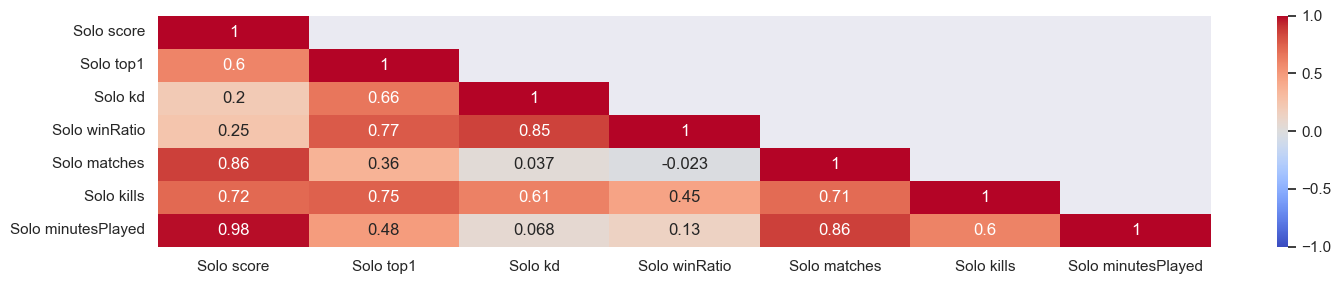

In [111]:
# Correlation among the features
sns.set(style="dark", palette="Set2")
plt.figure(figsize=(15,3))
sns.heatmap(corr_matrix, mask=mask, vmax=1, vmin=-1, annot=True, cmap="coolwarm")
plt.tight_layout()
plt.show()

#### **Features Engineering**

In [112]:
# Creating new features based on highly correlated ones to enhance the stats and the model
# Assigning a basic rank level based on the score per played match by top1
# Creating the deathRatio feature.

fortnite_solos["Solo deathRatio"] = round(((fortnite_solos["Solo matches"] - fortnite_solos["Solo top1"])/fortnite_solos["Solo matches"])*100,2)
fortnite_solos["Solo rankScore"] = round((fortnite_solos["Solo score"]/fortnite_solos["Solo matches"])*fortnite_solos["Solo top1"],2)
fortnite_solos["Basic Rank Level"] = fortnite_solos["Solo rankScore"].rank(na_option="keep", method="max", pct=True)
fortnite_solos["Basic Rank Level"] = pd.cut(fortnite_solos["Basic Rank Level"], bins=4, labels=["Beginner","Intermediate","Expert","Master"])

In [113]:
fortnite_solos

,user_id,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Solo deathRatio,Solo rankScore,Basic Rank Level
0,1,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,81.99,446061.36,Master
1,2,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,70.88,128007.23,Master
2,3,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,66.03,1535304.61,Master
3,4,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,96.72,24707.66,Intermediate
4,5,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,70.04,340448.46,Master
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,im bloom,106294,26,2.03,3.5,736,1440,4470,96.47,3754.95,Beginner
1431,1432,Twitch kaOzs_,803918,396,3.42,13.2,3001,8911,27375,86.80,106081.82,Master
1432,1433,slxyher,603939,310,1.69,5.1,6035,9679,20545,94.86,31022.55,Expert
1433,1434,RD-Antony,747295,71,1.10,1.9,3763,4048,31147,98.11,14099.91,Intermediate


In [114]:
# Selecting the most principal variables for processing in the model
fortnite_solos_filtered = fortnite_solos.loc[:,["user_id","Solo rankScore","Solo kd","Solo winRatio","Solo deathRatio"]]
features = fortnite_solos_filtered.columns.drop("user_id")

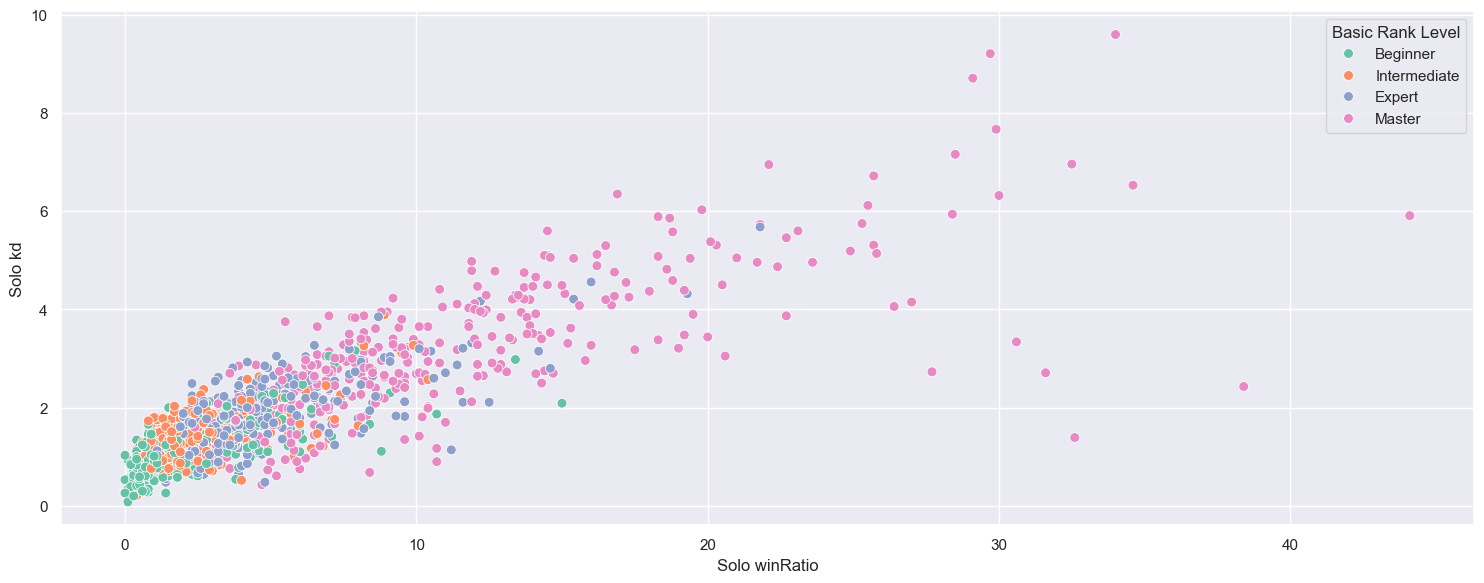

In [115]:
# Visualizing the correlation between the important variables.
sns.set(style="darkgrid", palette="Set2")
plt.figure(figsize=(15,6))
sns.scatterplot(data=fortnite_solos, y="Solo kd", x="Solo winRatio", hue="Basic Rank Level", s=50)
plt.tight_layout()
plt.show()

#### **Normalizing the dataset**

In [116]:
x_scaled = RobustScaler().fit_transform(X=fortnite_solos_filtered.drop(columns="user_id"))
x_scaled = pd.DataFrame(data=x_scaled, columns=features)

In [117]:
# Creating a new dataset which the most important features.
fortnite_solos_filtered_scaled = pd.concat([fortnite_solos["user_id"],x_scaled], axis=1)
fortnite_solos_filtered_scaled

,user_id,Solo rankScore,Solo kd,Solo winRatio,Solo deathRatio
0,1,7.862795,2.513043,3.355556,-3.326711
1,2,1.926687,6.286957,5.822222,-5.779249
2,3,28.192244,7.060870,6.911111,-6.849890
3,4,-0.001278,-0.556522,0.088889,-0.075055
4,5,5.891654,4.208696,6.022222,-5.964680
...,...,...,...,...,...
1430,1431,-0.392336,0.478261,0.133333,-0.130243
1431,1432,1.517475,1.686957,2.288889,-2.264901
1432,1433,0.116582,0.182609,0.488889,-0.485651
1433,1434,-0.199260,-0.330435,-0.222222,0.231788


#### **Training the model**

In [118]:
# Applying the algorithm KMeans to cluster the data in terms of the skills (variables)
model_kmeans = KMeans(n_clusters=2, algorithm="elkan", random_state=42)
fortnite_solos["cluster"] = model_kmeans.fit_predict(fortnite_solos_filtered_scaled.drop(columns=["user_id"]))

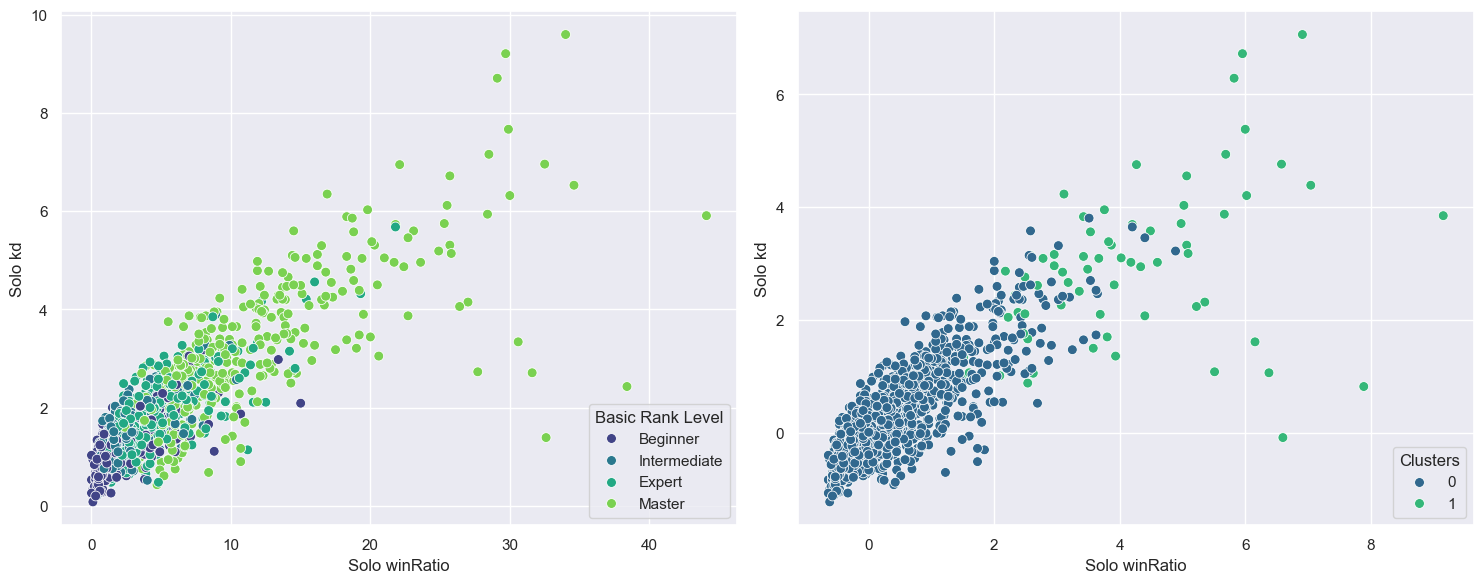

In [119]:
# Doing a comparison before and after clustering
sns.set(style="darkgrid", palette="Set2")
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
sns.scatterplot(data=fortnite_solos, y="Solo kd", x="Solo winRatio", hue="Basic Rank Level", s=50, palette="viridis", ax=axes[0])
sns.scatterplot(data = fortnite_solos_filtered_scaled, y = 'Solo kd', x = 'Solo winRatio', hue = model_kmeans.labels_, s=50, palette="viridis", ax=axes[1])
axes[0].legend(title="Basic Rank Level", loc=4, fancybox=True)
axes[1].legend(title="Clusters", loc=4, fancybox=True)
plt.tight_layout()
plt.show()

In [120]:
# Adding the cluster column to our main dataset (Solos).
fortnite_solos

,user_id,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Solo deathRatio,Solo rankScore,Basic Rank Level,cluster
0,1,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,81.99,446061.36,Master,1
1,2,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,70.88,128007.23,Master,1
2,3,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,66.03,1535304.61,Master,1
3,4,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,96.72,24707.66,Intermediate,0
4,5,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,70.04,340448.46,Master,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,im bloom,106294,26,2.03,3.5,736,1440,4470,96.47,3754.95,Beginner,0
1431,1432,Twitch kaOzs_,803918,396,3.42,13.2,3001,8911,27375,86.80,106081.82,Master,0
1432,1433,slxyher,603939,310,1.69,5.1,6035,9679,20545,94.86,31022.55,Expert,0
1433,1434,RD-Antony,747295,71,1.10,1.9,3763,4048,31147,98.11,14099.91,Intermediate,0


#### **Evaluating the model**

In [121]:
# In order to evaluate the model, we used silhouette score which provide us a value between -1 to 1.
# -1: Not clustering properly well
# 0: Room for improvements
# 1: Clustering properly well
round(silhouette_score(fortnite_solos_filtered_scaled, model_kmeans.labels_, metric="euclidean"),4)

0.0768

#### **Suggestions based on your skills**

In [122]:
# Finding similar users for a given user (e.g., userId = 649)
user_id = 649
print("Player Name:", fortnite_solos.loc[fortnite_solos["user_id"]==user_id]["Player"].values[0])

Player Name: SyfexG


#### **Evaluating the suggestions**

In [123]:
# Function which extracts the top 5 users based on similar skills.
def top_5(user_id):
    user_vector = fortnite_solos.loc[fortnite_solos["user_id"]==user_id]
    user_cluster = user_vector["cluster"]
    top5_similar_users = fortnite_solos.query("cluster==@user_cluster.iloc[0]").sample(n=5).reset_index(drop=True)
    top5_similar_users = pd.concat([top5_similar_users,user_vector])

    return top5_similar_users

#### **Analysing the skills among the other users**

In [124]:
top5_similar_users = top_5(user_id)
thetha = list(top5_similar_users["Player"])
thetha.append(thetha[0])

In [125]:
# Visualizing the skills among users utilizing a spider/radar plot.
r = list(top5_similar_users["Solo kd"])
r.append(r[0])

r2 = list(top5_similar_users["Solo winRatio"])
r2.append(r2[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r=r2,
  theta=thetha,
  fill='toself',
  name="Win Ratio"
))

fig.add_trace(go.Scatterpolar(
  r=r,
  theta=thetha,
  fill='toself',
  name="KD Ratio"
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True, title="KD vs Win Ratio"
)

fig.show()

In [126]:
# Visualizing the skills among users utilizing a spider/radar plot.
r = list(top5_similar_users["Solo matches"])
r.append(r[0])

r2 = list(top5_similar_users["Solo kills"])
r2.append(r2[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r=r2,
  theta=thetha,
  fill='toself',
  name="Solo Matches"
))

fig.add_trace(go.Scatterpolar(
  r=r,
  theta=thetha,
  fill='toself',
  name="Solo Kills"
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True, title="No. Matches vs No. Kills"
)

fig.show()

In [127]:
# Presenting the top 5 users recommended
top5_similar_users

,user_id,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Solo deathRatio,Solo rankScore,Basic Rank Level,cluster
0,1208,Alehandro nespit,1340168,255,1.72,2.3,11046,18607,52642,97.69,30938.15,Expert,0
1,1143,DGusta96,946594,294,2.61,5.6,5211,12839,36678,94.36,53405.99,Expert,0
2,594,OMEGA.LEB,699198,465,2.92,9.7,4805,12681,23441,90.32,67664.32,Master,0
3,1097,TwitchGipsy_loko,948071,58,0.91,0.9,6420,5804,41253,99.10,8565.13,Beginner,0
4,181,ozy.man.dias,1394628,296,1.08,6.5,4585,4627,61094,93.54,90034.87,Master,0
648,649,SyfexG,465944,61,1.09,1.3,4584,4950,18437,98.67,6200.39,Beginner,0


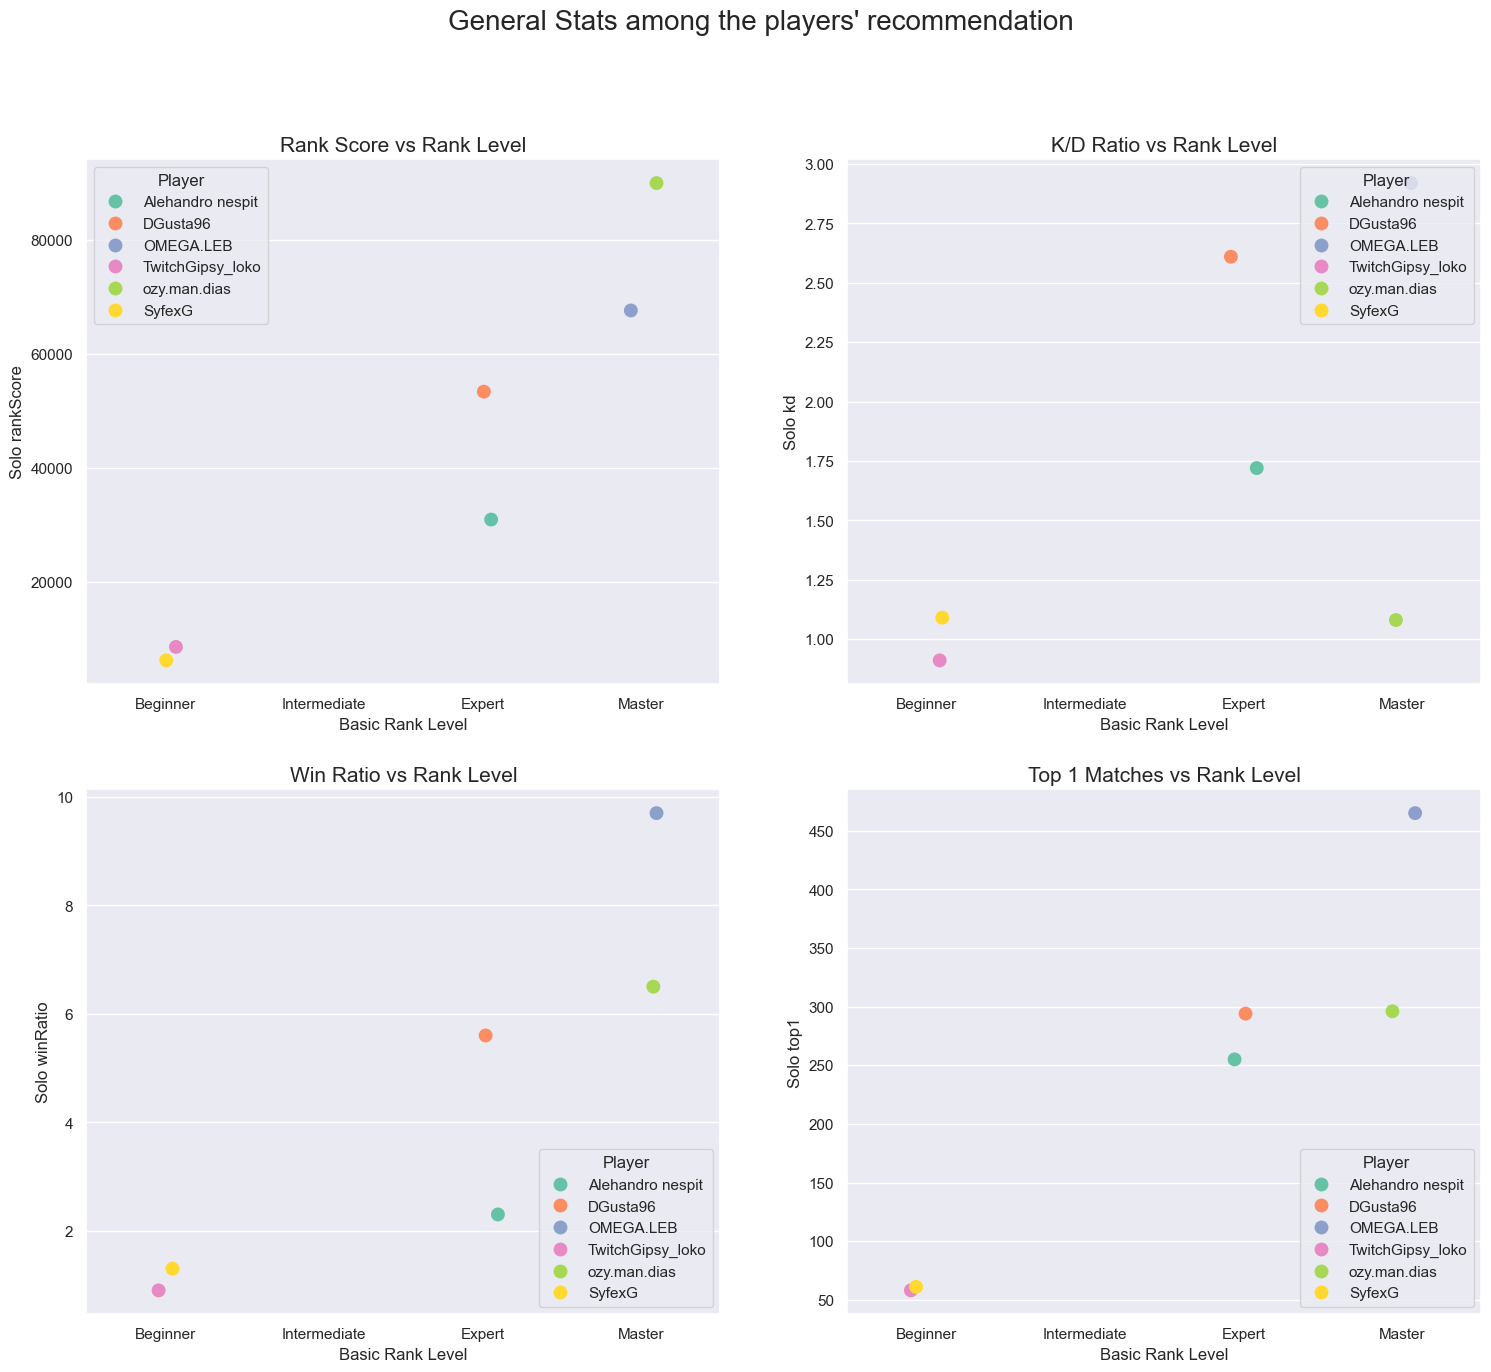

In [128]:
# Visualizing general stats per users, skills, and basic rank level.
sns.set(style="darkgrid", palette="Set2")
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18,15))
plt.suptitle("General Stats among the players' recommendation", fontsize=20)

sns.stripplot(data=top5_similar_users, x="Basic Rank Level", y="Solo rankScore", s=10, hue="Player", ax=axes[0,0])
sns.stripplot(data=top5_similar_users, x="Basic Rank Level", y="Solo kd", s=10, hue="Player", ax=axes[0,1])
sns.stripplot(data=top5_similar_users, x="Basic Rank Level", y="Solo winRatio", s=10, hue="Player", ax=axes[1,0])
sns.stripplot(data=top5_similar_users, x="Basic Rank Level", y="Solo top1", s=10, hue="Player", ax=axes[1,1])

axes[0,0].set_title("Rank Score vs Rank Level", fontsize=15)
axes[0,1].set_title("K/D Ratio vs Rank Level", fontsize=15)
axes[1,0].set_title("Win Ratio vs Rank Level", fontsize=15)
axes[1,1].set_title("Top 1 Matches vs Rank Level", fontsize=15)

axes[0,0].legend(loc=2, title="Player")
axes[0,1].legend(loc=1, title="Player")
axes[1,0].legend(loc=4, title="Player")
axes[1,1].legend(loc=4, title="Player")

plt.show()

### **Game Mode: Duos**

In [129]:
# Create a dataframe for duos game mode
fortnite_duos = pd.concat([fortnite["user_id"], fortnite["Player"], 
                           fortnite["Duos score"], fortnite["Duos top1"], 
                           fortnite["Duos kd"], fortnite["Duos winRatio"], 
                           fortnite["Duos matches"], fortnite["Duos kills"], 
                           fortnite["Duos minutesPlayed"]], axis=1)
fortnite_duos.head(10)

,user_id,Player,Duos score,Duos top1,Duos kd,Duos winRatio,Duos matches,Duos kills,Duos minutesPlayed
0,1,Prospеring,4702684,5584,10.71,45.7,12229,71137,133725
1,2,BH nixxxay,4065613,4141,9.49,21.5,19252,143330,119678
2,3,Raпger,1137279,1390,7.78,24.6,5649,33123,31744
3,4,Idk_Pi,5326457,2249,1.02,9.2,24365,22498,223469
4,5,Twitch.GryphonRB,3692623,5743,11.13,50.6,11339,62270,93804
5,6,Twitch Kayotica,1298412,1242,4.19,15.5,8007,28337,37799
6,7,FaZe Replays,2508015,1935,4.34,9.6,20249,79433,82553
7,8,NiteGamerYT 190k,6438735,5449,3.52,19.8,27577,77818,217492
8,9,ᴮᵒˢˢン,118705,65,0.68,2.9,2243,1486,5071
9,10,CIUPEA 144.HZ,5873450,1250,0.91,3.4,36776,32332,270990


In [130]:
# Analysing null and duplicated values
fortnite_duos.isna().sum(), fortnite_duos.duplicated().sum()

(user_id               0
 Player                0
 Duos score            0
 Duos top1             0
 Duos kd               0
 Duos winRatio         0
 Duos matches          0
 Duos kills            0
 Duos minutesPlayed    0
 dtype: int64,
 0)

In [131]:
corr_matrix = fortnite_duos.drop(columns=["user_id","Player"]).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

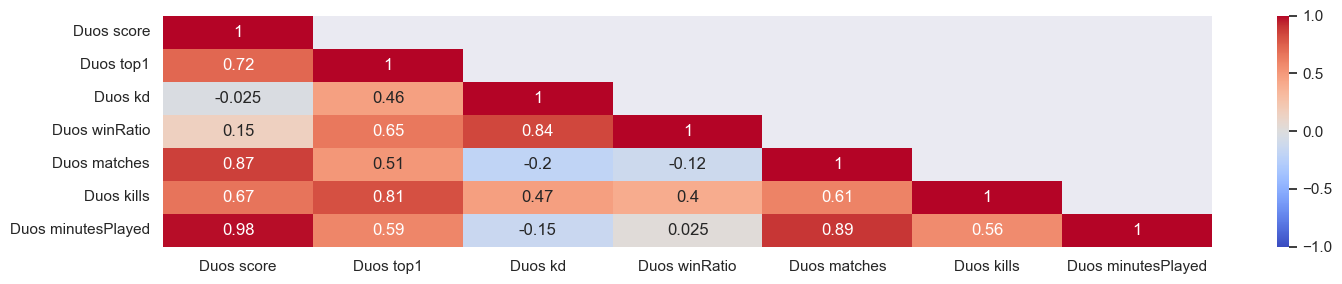

In [132]:
# Correlation among the features
sns.set(style="dark", palette="Set2")
plt.figure(figsize=(15,3))
sns.heatmap(fortnite_duos.drop(columns=["user_id","Player"]).corr(), mask=mask, vmax=1, vmin=-1, annot=True, cmap="coolwarm")
plt.tight_layout()
plt.show()

#### **Features Engineering**

In [133]:
# Creating new features based on highly correlated ones to enhance the stats and the model
# Assigning a basic rank level based on the score per played match by top1
# Creating the deathRatio feature.

fortnite_duos["Duos deathRatio"] = round(((fortnite_duos["Duos matches"] - fortnite_duos["Duos top1"])/fortnite_duos["Duos matches"])*100,2)
fortnite_duos["Duos rankScore"] = round((fortnite_duos["Duos score"]/fortnite_duos["Duos matches"])*fortnite_duos["Duos top1"],2)
fortnite_duos["Basic Rank Level"] = fortnite_duos["Duos rankScore"].rank(na_option="keep", method="max", pct=True)
fortnite_duos["Basic Rank Level"] = pd.cut(fortnite_duos["Basic Rank Level"], bins=4, labels=["Beginner","Intermediate","Expert","Master"])

In [134]:
fortnite_duos

,user_id,Player,Duos score,Duos top1,Duos kd,Duos winRatio,Duos matches,Duos kills,Duos minutesPlayed,Duos deathRatio,Duos rankScore,Basic Rank Level
0,1,Prospеring,4702684,5584,10.71,45.7,12229,71137,133725,54.34,2147337.27,Master
1,2,BH nixxxay,4065613,4141,9.49,21.5,19252,143330,119678,78.49,874491.14,Master
2,3,Raпger,1137279,1390,7.78,24.6,5649,33123,31744,75.39,279840.29,Master
3,4,Idk_Pi,5326457,2249,1.02,9.2,24365,22498,223469,90.77,491656.14,Master
4,5,Twitch.GryphonRB,3692623,5743,11.13,50.6,11339,62270,93804,49.35,1870247.28,Master
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,im bloom,2208424,1551,2.53,8.2,18922,43928,81098,91.80,181020.27,Expert
1431,1432,Twitch kaOzs_,890900,739,2.88,11.4,6493,16562,29274,88.62,101397.67,Intermediate
1432,1433,slxyher,432952,442,1.90,9.1,4867,8417,14596,90.92,39318.84,Beginner
1433,1434,RD-Antony,1010165,851,5.23,24.3,3497,13846,35857,75.66,245825.11,Master


In [135]:
# Select the most principal variables for processing in the model
fortnite_duos_filtered = fortnite_duos.loc[:,["user_id","Duos rankScore","Duos kd","Duos winRatio","Duos deathRatio"]]
features = fortnite_duos_filtered.columns.drop("user_id")

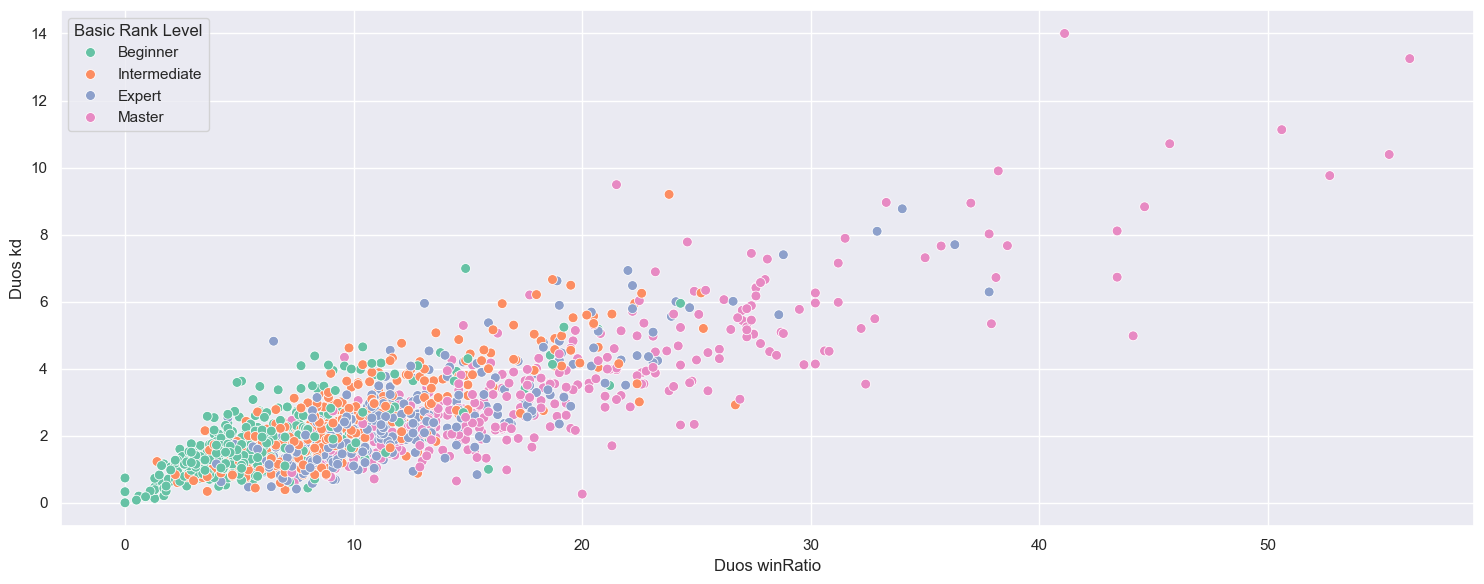

In [136]:
sns.set(style="darkgrid", palette="Set2")
plt.figure(figsize=(15,6))
sns.scatterplot(data=fortnite_duos, y="Duos kd", x="Duos winRatio", hue="Basic Rank Level", s=50)
plt.tight_layout()
plt.show()

#### **Normalizing the dataset**

In [137]:
x_scaled = RobustScaler().fit_transform(X=fortnite_duos_filtered.drop(columns="user_id"))
x_scaled = pd.DataFrame(data=x_scaled, columns=features)

In [138]:
fortnite_duos_filtered_scaled = pd.concat([fortnite_solos["user_id"],x_scaled], axis=1)
fortnite_duos_filtered_scaled

,user_id,Duos rankScore,Duos kd,Duos winRatio,Duos deathRatio
0,1,11.815185,5.208459,4.258824,-4.236673
1,2,4.428874,4.471299,1.411765,-1.407147
2,3,0.978122,3.438066,1.776471,-1.770357
3,4,2.207287,-0.646526,-0.035294,0.031634
4,5,10.207235,5.462236,4.835294,-4.821324
...,...,...,...,...,...
1430,1431,0.404671,0.265861,-0.152941,0.152314
1431,1432,-0.057378,0.477341,0.223529,-0.220269
1432,1433,-0.417621,-0.114804,-0.047059,0.049209
1433,1434,0.780733,1.897281,1.741176,-1.738723


#### **Training the model**

In [139]:
model_kmeans = KMeans(n_clusters=4, algorithm="elkan", random_state=42)
fortnite_duos_filtered_scaled["cluster"] = model_kmeans.fit_predict(fortnite_duos_filtered_scaled.drop(columns=["user_id"]))
fortnite_duos["cluster"] = fortnite_duos_filtered_scaled["cluster"]

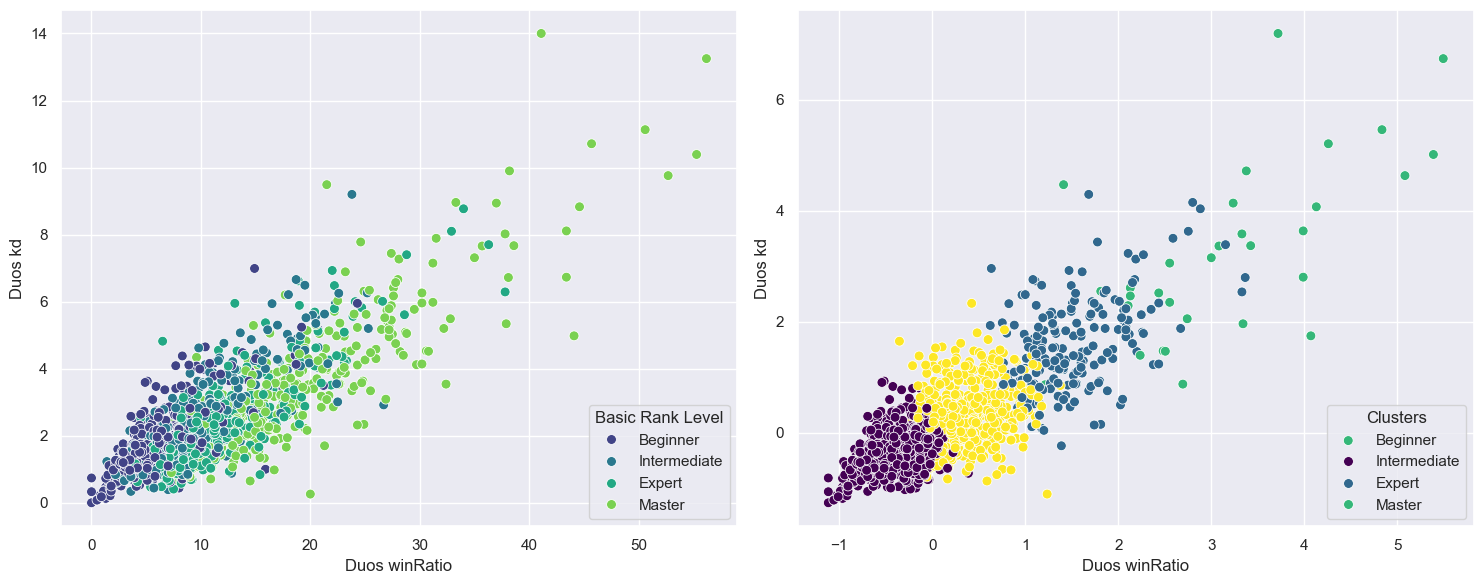

In [140]:
sns.set(style="darkgrid", palette="Set2")
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
sns.scatterplot(data=fortnite_duos, y="Duos kd", x="Duos winRatio", hue="Basic Rank Level", s=50, palette="viridis", ax=axes[0])
sns.scatterplot(data = fortnite_duos_filtered_scaled, y = 'Duos kd', x = 'Duos winRatio', hue = model_kmeans.labels_, s=50, palette="viridis", ax=axes[1])
axes[0].legend(title="Basic Rank Level", loc=4, fancybox=True)
axes[1].legend(title="Clusters", labels=["Beginner","Intermediate","Expert","Master"], loc=4, fancybox=True)
plt.tight_layout()
plt.show()

In [141]:
X = fortnite_duos_filtered_scaled.drop(columns=["user_id","cluster"])
y = fortnite_duos_filtered_scaled["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
model_rf = RandomForestClassifier(n_estimators=1000, criterion="entropy", random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

#### **Evaluating the model**

In [143]:
silhouette_score(fortnite_duos_filtered_scaled, model_kmeans.labels_, metric='euclidean')

-0.09853941409164219

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       220
           1       0.95      0.90      0.93        62
           2       1.00      0.80      0.89        10
           3       0.93      0.98      0.95       139

    accuracy                           0.96       431
   macro avg       0.97      0.91      0.94       431
weighted avg       0.96      0.96      0.96       431



In [145]:
accuracy_score(y_test, y_pred)

0.962877030162413

In [146]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

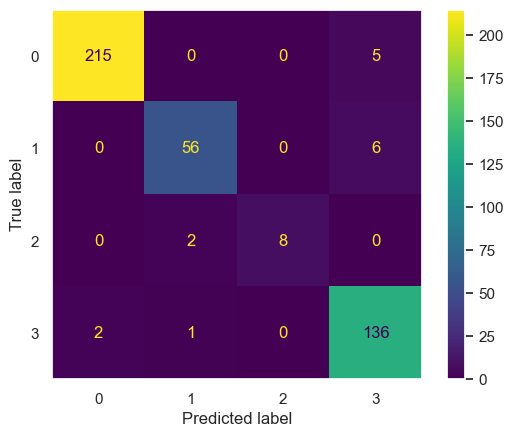

In [147]:
sns.set(style="darkgrid", palette="Set2")
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.grid(False)
plt.show()

#### **Suggestions based on your skills**

In [148]:
new_players = pd.DataFrame({
    "Player": ["Player1","Player2","Player3"],
    "Duos rankScore": [np.random.randint(1000,2147337), np.random.randint(1000,2147337), np.random.randint(1000,2147337)],
    "Duos kd": [np.random.randint(5,14), np.random.randint(5,14), np.random.randint(5,14)],
    "Duos winRatio": [np.random.randint(15,56), np.random.randint(15,56), np.random.randint(15,56)],
    "Duos deathRatio": [np.random.randint(43,100), np.random.randint(43,100), np.random.randint(43,100)]
})

new_players

,Player,Duos rankScore,Duos kd,Duos winRatio,Duos deathRatio
0,Player1,1096662,8,49,70
1,Player2,383865,5,31,76
2,Player3,199516,6,49,85


In [149]:
new_players_scaled = pd.DataFrame(RobustScaler().fit_transform(new_players.drop(columns=["Player"])), 
                                  columns=new_players.drop(columns=["Player"]).columns)
new_players["cluster"] = model_rf.predict(new_players_scaled)
print("\nPredicted Matchmaking Ranks for New Players:")
new_players


Predicted Matchmaking Ranks for New Players:


,Player,Duos rankScore,Duos kd,Duos winRatio,Duos deathRatio,cluster
0,Player1,1096662,8,49,70,3
1,Player2,383865,5,31,76,0
2,Player3,199516,6,49,85,0


In [150]:
def duo_matchmaking(player):
    player_vector = new_players.loc[new_players["Player"]==player]
    player_cluster = player_vector["cluster"]
    duo_similar_user = fortnite_duos.query("cluster==@player_cluster.iloc[0]").sample(n=1).reset_index(drop=True)
    duo_similar_user = pd.concat([duo_similar_user.loc[:,["Player","Duos winRatio","Duos kd","cluster"]],
                                  player_vector.drop(columns=["Duos rankScore","Duos deathRatio"])])

    return duo_similar_user

#### **Analysing your Duo skill**

In [151]:
player = "Player1"
duo_player = duo_matchmaking(player)
print("Your next game have been matched with:")
duo_player

Your next game have been matched with:


,Player,Duos winRatio,Duos kd,cluster
0,Sharpie25,14.2,2.77,3
0,Player1,49.0,8.00,3


In [152]:
fortnite_duos.query("Player=='SyfexG'")

,user_id,Player,Duos score,Duos top1,Duos kd,Duos winRatio,Duos matches,Duos kills,Duos minutesPlayed,Duos deathRatio,Duos rankScore,Basic Rank Level,cluster
648,649,SyfexG,1268964,375,1.24,3.5,10702,12757,51809,96.5,44464.73,Beginner,0
